<a href="https://colab.research.google.com/github/KotaShimomura/pythondata/blob/master/no3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#確率

In [ ]:
import numpy as np

In [ ]:
np.random.seed(0)
dice = np.array([1,2,3,4,5,6])
for i in  range(10):
  d = np.random.choice(dice)
  print(d)

5
6
1
4
4
4
2
4
6
3


np.random.choice() は配列からランダムに要素を選択して返します。

## 統計的確率

ある試行を $n$ 回繰り返し行って事象 $A$ が $r$ 回起こったとき、事象 $A$ の確率 $P(A)$ を次のように定義します。
$$ P(A) = \frac{r}{n} $$

これを**統計的確率**といいます。

サイコロの場合、サイコロを繰り返し振って偶数の目が出た回数を数え、それを試行回数で割ることによって求められます。

In [ ]:
import numpy as np

np.random.seed(0)
N = 1000000
dice = np.array([1, 2, 3, 4, 5, 6])
d = np.random.choice(dice, N)
print(len(d[d%2==0])/N)

0.499394


## ベイズの定理
条件付き確率の定義から、**ベイズの定理**が導かれます。
$$ P(B\,|\,A) = \frac{P(A\,|\,B)P(B)}{P(A\,|\,B)P(B) + P(A\,|\,B^c)P(B^c)} $$
ここで、$B^c$　は　$B$ の補集合を表します。
つまり、$P(B^c)$ は $B$ が起こらない確率であり、$P(B^c) = 1 - P(B)$です。

例えば、次のような新型ウイルスについて考えます。
*   感染している人の割合が全人口の1%
*   このウイルスに感染している人にPCR検査を行うと99.99%の確率で正しく陽性と判定できる
*   このウイルスに感染していない人にPCR検査を行うと0.1%の確率で陽性となってしまう

このとき、ベイズの定理を使って、この検査で陽性となった人が本当にウイルスに感染している確率を求めることができます。

検査で陽性になるという事象を $A$、ウイルスに感染しているという事象を $B$ とします。
すると、ベイズの定理より、次のように計算できます。

In [ ]:
p = 0.9999 * 0.01 / (0.9999 * 0.01 + 0.001 * 0.99)
print(p)

0.9099099099099099


## 確率変数と確率分布
**確率変数**は、確率が割り当てられる値のことです。

サイコロの場合、サイコロの出る目が確率変数となり、その値は $\{ 1, 2, 3, 4, 5, 6\}$ のいずれかです。

サイコロを投げて1の目が出る確率は、確率変数を $X$ として $P(X = 1)$ または $P(1)$ と表します。

**確率分布**は、確率変数に対する確率の分布です。

サイコロの場合、確率分布は次のようになります。

$X$ | $1$ | $2$ | $3$ | $4$ | $5$ | $6$
--- | --- | --- | --- | --- | --- | ---
$P(X)$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$


## 確率質量関数、確率密度関数、累積分布関数
**確率質量関数**（**確率関数**）は、離散型の確率変数に対してその確率を対応させる関数であり、記号 $f$ で表します。

サイコロの場合、$f(X) = \frac{1}{6}$ です。

**確率密度関数**は、連続型の確率変数に対してその確率を対応させる関数であり、同じく記号 $f$ で表します。

**累積分布関数**は、確率変数 $X$ が**ある値 $x$ 以下となる確率**を表す関数であり、記号 $F$ で表します。

離散型の確率変数の場合、$F(x) = P(X \le x) = \sum_{X \le x} f(X)$ となります。

連続型の確率変数の場合、$F(x) = P(X \le x) = \int_{-\infty}^x f(X) dX$ となります。

## 主な分布関数

### 一様分布
**一様分布**は、サイコロのように、すべての事象についてその確率が等しい分布です。

`np.random.randint()` を用いて離散型の一様分布に従って乱数を生成し、$X$の目が出た割合と累積割合を描くと次のようになります。

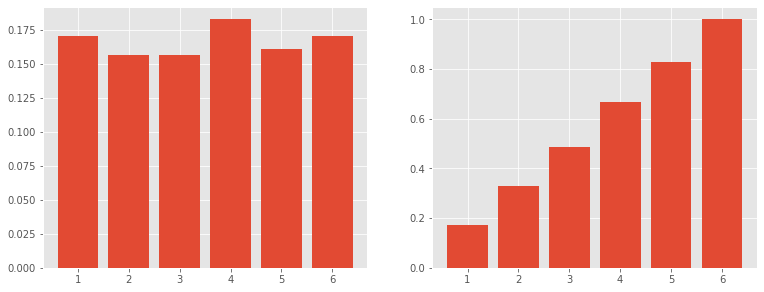

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 1000  # 試行回数
n = 6  # 確率変数の最大値（最小値は1)
X = np.arange(1, n+1)
a = np.random.randint(1, n+1, N)
hist, bins = np.histogram(a, bins=n)
f = hist / N  # 割合
F = np.empty(n)  # 累積割合
for k in range(n):
    F[k] = np.sum(f[:k+1])

plt.style.use('ggplot')
plt.figure(figsize=[12.8, 4.8])
plt.subplot(1, 2, 1)
plt.bar(X, f)
plt.subplot(1, 2, 2)
plt.bar(X, F)
plt.show()

`np.arange()` は指定された範囲の等差数列を `np.ndarray` で返します。
`np.histogram()` は度数を `np.ndarray` で返します。
`np.empty()` は指定された長さの空の `np.ndarray` を返します。
`plt.subplot(nrows, ncols, index)` は、図を縦 `nrows`、横 `ncols` に分割し、グラフを描く場所を `index` で指定します。

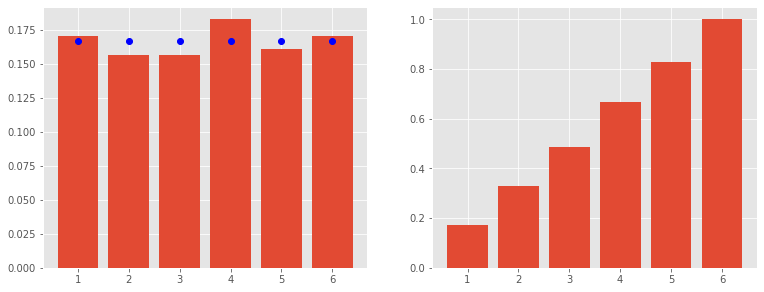

In [ ]:
plt.figure(figsize=[12.8, 4.8])
plt.subplot(1, 2, 1)
plt.bar(X, f)
y = np.zeros(n) + 1 / n
plt.plot(X, y, 'ob')
plt.subplot(1, 2, 2)
plt.bar(X, F)
plt.show()

連続形の一様分布に基づいてデータを生成にするには np.random.uniform() を使います。

### 二項分布
「コイン・トスで表が出れば成功」というように、結果が2つしかない試行を**ベルヌーイ試行**といい、確率 $p$ で成功するベルヌーイ試行を$n$回行ったときに $k$ 回成功する確率の分布を**二項分布**といい、$B(n, p)$ と表します。
$$ P(X = k) = {}_n\mathrm{C}_k p^k (1 - p)^{n-k} $$

二項分布に従う確率変数の期待値は $E[X] = np$、分散は $V[X] = np(1-p)$ です。

`np.random.binomial()` を用いて二項分布に従ってデータを生成し、10回のコイン・トスを行ったときに$X$回表が出た割合と累積割合を描くと次のようになります。

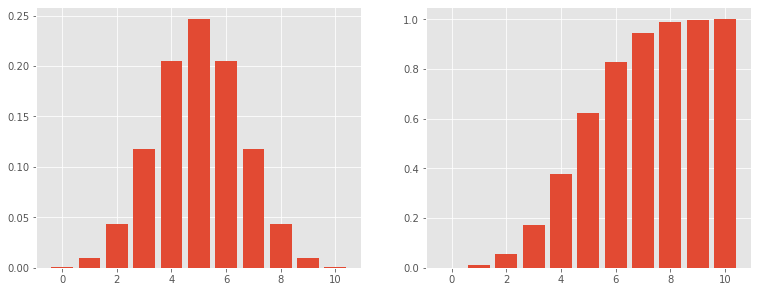

平均: 5.002003
分散: 2.498062987990999


In [ ]:
np.random.seed(0)
N = 1000000  # 繰り返し数
n = 10  # 試行回数
p = 0.5  # 成功確率
X = np.arange(0, n+1)
a = np.random.binomial(n, p, N)
hist, bins = np.histogram(a, bins=n+1)
f = hist / N  # 割合
F = np.empty(n+1)  # 累積割合
for k in range(n+1):
    F[k] = np.sum(f[:k+1])

plt.style.use('ggplot')
plt.figure(figsize=[12.8, 4.8])
plt.subplot(1, 2, 1)
plt.bar(X, f)
plt.subplot(1, 2, 2)
plt.bar(X, F)
plt.show()

mu = np.mean(a)
var = np.var(a)
print('平均:', mu)
print('分散:', var)

### ポアソン分布
二項分布において、試行回数 $n$ が十分に大きく、かつ、成功確率 $p$ が非常に小さい場合、$np$ は一定であると考えることができます。
$\lambda = np$ とおくと、ある期間に平均$\lambda$回起こる現象が、ある期間に$X$回起きる確率の分布を表し、$X = k$となる確率は次のように計算できます。
$$ P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$
この確率の分布を**ポアソン分布**といいます。
ここで、$e$ はネイピア数（自然対数の底）で $e = 2.71828\dots$ です。

ポアソン分布に従うデータの期待値は $E[X] = \lambda$、分散も $V[E] = \lambda$ です。

ポアソン分布がポアソンによって発見されたのは1837年ですが、それから約60年後の1898年になって、ボルトキービッチが20年間に馬に蹴られて死んだ兵士の数を調べたところ、1年間に死ぬ兵士は平均0.61人であり、1年に死んだ兵士数の分布が $\lambda = 0.61$ のポアソン分布に非常によく似ていることを発見してその有用性が示されました。

`np.random.poisson()` を用いてポアソン分布に従ってデータを生成し、1年間に死んだ兵士が$X$人だった割合と累積割合を描くと次のようになります。

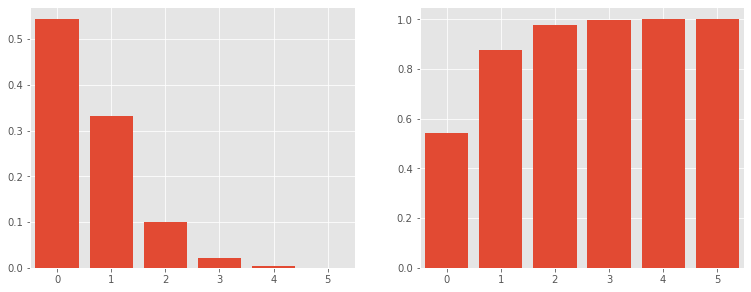

平均: 0.610873
分散: 0.6115831778709997


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 1000000  # 繰り返し数
n = 5
lambda_ = 0.61
X = np.arange(0, n+1)
a = np.random.poisson(lambda_, N)
hist, bins = np.histogram(a, bins=n+1, range=[0,n+1])
f = hist / N  # 割合
F = np.empty(n+1)  # 累積割合
for k in range(n+1):
    F[k] = np.sum(f[:k+1])

plt.style.use('ggplot')
plt.figure(figsize=[12.8, 4.8])
plt.subplot(1, 2, 1)
plt.bar(X, f)
plt.xlim(-0.5, n+0.5)
plt.subplot(1, 2, 2)
plt.bar(X, F)
plt.xlim(-0.5, n+0.5)
plt.show()

mu = np.mean(a)
var = np.var(a)
print('平均:', mu)
print('分散:', var)

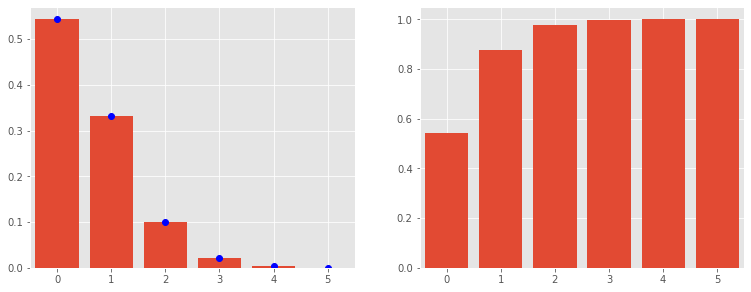

In [ ]:
from scipy.special import factorial

plt.figure(figsize=[12.8, 4.8])
plt.subplot(1, 2, 1)
plt.bar(X, f)
y = np.exp(-lambda_) * lambda_**X / factorial(X)
plt.plot(X, y, 'ob')
plt.xlim(-0.5, n+0.5)
plt.subplot(1, 2, 2)
plt.bar(X, F)
plt.xlim(-0.5, n+0.5)
plt.show()

### 正規分布
左右対象の連続型の確率分布で、最も重要な確率分布が**正規分布**であり、$N(\mu, \sigma)$と表します。
正規分布の確率密度関数は、以下の式で表されます。
$$ f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left(-\frac{(x - \mu)^2}
{2\sigma^2} \right) $$
ここで、$\mu$は平均、$\sigma$は標準偏差を表します。

正規分布に従うデータの期待値は $E[X] = \mu$、分散は $V[X] = \sigma^2$ です。

`np.random.normal()` を用いて正規分布に従ってデータを生成し、平均が70点、標準偏差が10点のテストにおいて$X$点を取った学生の割合と累積割合を描くと次のようになります。

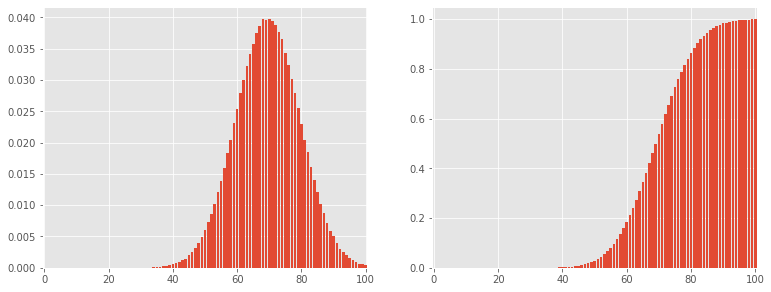

平均: 70.01512146515539
分散: 99.98426582229106


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 1000000  # 繰り返し数
n = 100
mu = 70
sigma = 10
X = np.arange(0, n+1)
a = np.random.normal(mu, sigma, N)
hist, bins = np.histogram(a, bins=n+1, range=[0,n+1])
f = hist / N  # 割合
F = np.empty(n+1)  # 累積割合
for k in X:
    F[k] = np.sum(f[:k+1])

plt.style.use('ggplot')
plt.figure(figsize=[12.8, 4.8])
plt.subplot(1, 2, 1)
plt.bar(X, f)
plt.xlim(-0.5, n+0.5)
plt.subplot(1, 2, 2)
plt.bar(X, F)
plt.xlim(-0.5, n+0.5)
plt.show()

mu = np.mean(a)
var = np.var(a)
print('平均:', mu)
print('分散:', var)

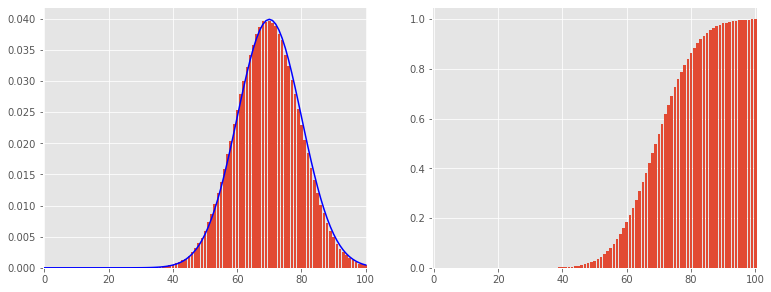

In [ ]:
plt.figure(figsize=[12.8, 4.8])
plt.subplot(1, 2, 1)
plt.bar(X, f)
y = 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(X-mu)**2/(2*sigma**2))
plt.plot(X, y, '-b')
plt.xlim(-0.5, n+0.5)
plt.subplot(1, 2, 2)
plt.bar(X, F)
plt.xlim(-0.5, n+0.5)
plt.show()

## 大数の法則と中心曲限定理

### 大数の法則
1713年にヤコブ・ベルヌーイが次の**大数の法則**を発見しました。

**標本を大きくすると、標本の平均は母集団の平均に近づく。**

`np.random.randint()` を用いてサイコロを降り、試行回数を増やしたときの平均の推移を描くと次のようになります。

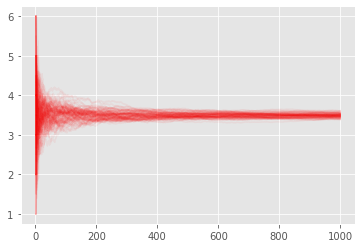

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
dice = np.array([1, 2, 3, 4, 5, 6])
x = np.arange(1, n+1)

plt.style.use('ggplot')
plt.figure()
for i in range(100):
    np.random.seed(i)
    a = np.random.choice(dice, n)
    y = np.empty(n)
    for j in range(n):
        y[j] = np.mean(a[:j+1])
    plt.plot(x, y, '-r', alpha=.05)
plt.show()

### 中心曲限定理
1733年にド・モアブルが二項分布における**中心極限定理**を発見しました。1810年にラプラスがそれを拡張し、1922年にリンデベルグが一般的な分布において次の中心極限定理が成り立つことを証明しました。

**標本を大きくすると、平均 $\mu$、分散 $\sigma^2$ の母集団から抽出した標本の平均の分布は平均 $\mu$、分散 $\sigma^2/n$ の正規分布に近づく。**

`np.random.randint()` を用いてサイコロを振り、試行回数を増やした時の平均の分布の推移を描くと次のようになります。

n = 1


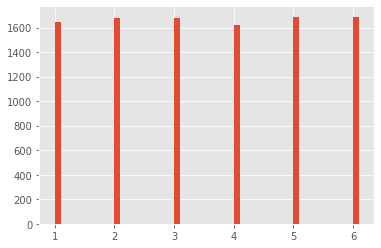

n = 2


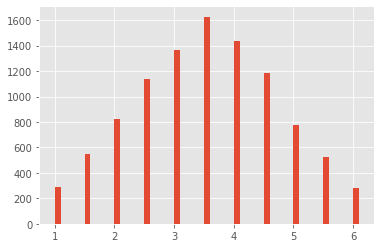

n = 3


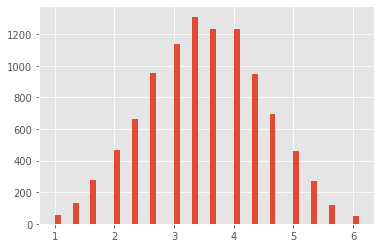

n = 4


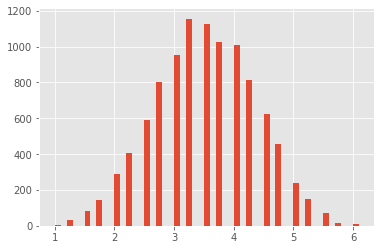

n = 5


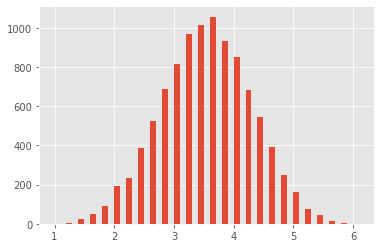

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
dice = np.array([1, 2, 3, 4, 5, 6])

plt.style.use('ggplot')
for i in range(1, 6):
    print('n =', i)
    y = np.empty(N)
    for j in range(N):
        np.random.seed(j)
        a = np.random.choice(dice, i)
        y[j] = np.mean(a)
    plt.figure()
    plt.hist(y, bins=51, range=[1, 6.1])
    plt.show()

# 推定
標本を図や統計量で示すことを記述統計というのに対し、母集団の情報を標本から推定することを**推定統計**といいます。

## 点推定と不偏推定量
**点推定**とは、推定量を一点で推定する方法です。

推定量の期待値が真の値であるものを**不偏推定量**といいます。

標本平均の期待値は母集団の平均に等しいので、標本平均は母集団の平均の不偏推定量です。
しかし、標本標準偏差の期待値は母標準偏差に等しくないので、標本標準偏差は母標準偏差の不偏推定量ではありません。

In [ ]:
import numpy as np

np.random.seed(0)
a = np.array([1,2,3,4,5,6])
x = np.random.choice(a,10)

print(x)
print('標本平均', np.mean(x))

[5 6 1 4 4 4 2 4 6 3]
標本平均 3.9


### 不偏分散と不偏標準偏差
分散を求めるときに標本のサイズ $n$ で割る代わりに $n - 1$ で割ったものを**標本不偏分散**（**不偏分散**）といいます。
$$ s^2 = \frac{1}{n - 1} \sum_{x_i \in S} (x_i - \mu)^2$$
標本不偏分散の平方根をとったものを**標本不偏標準偏差**（**不偏標準偏差**）といいます。
$$ s = \sqrt{\frac{1}{n - 1} \sum_{x_i \in S} (x_i - \mu)^2}$$

不偏分散の期待値は母集団の分散に等しいので、不偏分散は母分散の不偏推定量です。
また、不偏標準偏差の期待値も母集団の標準偏差に等しいので、不偏標準偏差は母集団の標準偏差の不偏推定量です。

不偏分散を求めるには、`np.var()` にオプション引数 `ddof=1` を指定します。
同様に、不偏標準偏差を求めるには、`np.std()` にオプション引数 `ddof=`1 を指定します。

In [ ]:
import numpy as np

np.random.seed(0)
a = np.array([1, 2, 3, 4, 5, 6])
x = np.random.choice(a, 10)

print(x)
print('標本不変分散', np.var(x, ddof = 1))
print('標本分散',np.var(x))
print('標本不変標準偏差:', np.std(x, ddof=1))
print('標本標準偏差', np.std(x))

[5 6 1 4 4 4 2 4 6 3]
標本不変分散 2.5444444444444443
標本分散 2.29
標本不変標準偏差: 1.5951314818673865
標本標準偏差 1.5132745950421556


### 分散と標準偏差を求めるときの注意
`np.var()` と `np.std()` のデフォルトは分散と標準偏差ですが、これはプログラミングの世界では少数派です。

同じPythonでも、標準の`statistics`ライブラリーやデータ分析ライブラリーのPandasは、デフォルトが標本不偏分散と標本不偏標準偏差です。

この他、統計解析ツールのR、表計算ソフトのExcelなども、標本不偏分散と標本不偏標準偏差がデフォルトです。

## 区間推定、標準不確かさ（標準誤差）、信頼区間

### 区間推定
**区間推定**とは、推定量を区間で推定する方法です。

### 標準不確かさ（標準誤差）
中心極限定理より、平均 $\mu$、分散 $\sigma^2$ の母集団の標本平均は平均 $\mu$、分散 $\frac{\sigma^2}{n}$（標準偏差 $\frac{\sigma}{\sqrt{n}}$）の正規分布に従います。

母集団の標準偏差 $\sigma$ を標本の不偏標準偏差 $s$ で推定し、それを標本の大きさ $n$ の平方根で割ったものを**標準不確かさ**（**標準誤差**）といい、$u$ と表します。
$$ u = \frac{s}{\sqrt{n}}$$

標準不確かさに**包含係数** $k$ を掛けたものを**拡張不確かさ**といい、$U$ と表します。
$$ U = k \times u$$

### 拡張不確かさを用いた信頼区間
$n \ge 11$ のとき、測定値の95%が包含係数 $k=2$ の $\mu \pm U$ の範囲に含まれます。
この区間を**信頼区間**、「95%」を**信頼水準**といいます。
（この方法が国際標準に決まっています。）

In [ ]:
import numpy as np

np.random.seed(0)
a = np.array([1, 2, 3, 4, 5, 6])
x = np.random.choice(a, 100)

n = len(x)
mu = np.mean(x)
s = np.std(x, ddof=1)
u = s / np.sqrt(n)
U = 2 * u
print('x = ', mu, '±', U)

x =  3.42 ± 0.3448671241700684


### t分布を用いた信頼区間
標本の平均と母集団の平均の偏差を標準不確かさで割ったものは、**t分布**に従うことがわかっています。

t分布は、正規分布によく似た形で、標本の大きさが $n = \infty$ のとき正規分布に一致します。

そこで、t分布において95%の測定値が含まれる区間を推定したものを**95%信頼区間**（**95%CI**）といいます。
（医学分野などではこちらが使われています。）

In [ ]:
from scipy.stats import t

U = t.ppf(0.975, n-1) * u
print('x = ', mu, '±', U)

x =  3.42 ± 0.3421455968981497


`scipy.stats.t.ppf()` はt分布の累積分布関数が指定した値をとる変数を返します。


`0.975` を指定しているのは、上位2.5%の点を調べるためです。片側が2.5%のとき、両側で5%になります。
`n-1` はt分布の自由度で、標本の大きさから1を引いたものです。

# 検定
統計量の分布を調べて、「計測した統計量が偶然に起こることはほとんどない」ことを調べることによって、偶然ではないことを示すことを**統計的仮説検定**（**検定**）といいます。

## t検定: 平均の差の検定
統計的検定では、「AとBの間には差がある」という仮説に対して、「AとBの間には差がない」という反対の仮説を立て、後者の仮説が成り立たないことを示すことによって、前者の仮説が成り立つことを示します。

否定される仮説を**帰無仮説**といい、帰無仮説を否定することを**棄却する**といいます。 帰無仮説が棄却されることによって支持される、帰無仮説の反対の仮説を**対立仮説**といいます。

標本の平均と母集団の平均の偏差はt分布に従うことから、t分布を使って「計測した平均の差が偶然に起こることはほとんどないことを調べることによって検定する方法を**t検定**といいます。

「ほとんどない」の基準を**有意水準**といいます。
5%有意水準なら高々5%の確率でしか起こらない、1%有意水準なら高々1%の確率でしか起こらないことを意味します。
（5%有意水準がよく使われていますが、統計学者たちは0.5%有意水準を使うよう提案しています。）

### 対応のあるt検定
同じデータセットに対して元の機械学習アルゴリズムと改良したアルゴリズムの平均正解率を比較するときのように、同じものに対する平均に差があることを示すには**対応のあるt検定**を使います。

対応のあるt検定を行うには、有意水準を決めて、`scipy.stats.ttest_rel()` を使います。
`scipy.stats.ttest_rel()` はt統計量と**p値** (p-value) を返します。

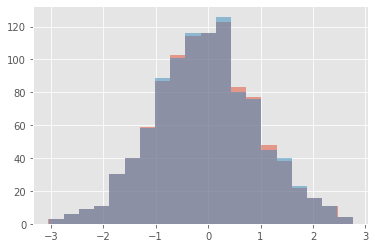

p = 0.6567453190576436
統計的有意な差はない


In [ ]:
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

np.random.seed(0)
n = 1000
sig_lev = 0.05  # 有意水準
x1 = np.random.normal(0, 1, n)
e = np.random.normal(0, 0.01, n)
x2 = x1 + e

plt.style.use('ggplot')
plt.figure()
plt.hist(x1, bins=20, alpha=.5)
plt.hist(x2, bins=20, alpha=.5)
plt.show()

t, p = ttest_rel(x1, x2)
print('p =', p)
if p < sig_lev:
    print('統計的有意な差がある')
else:
    print('統計的有意な差はない')

### 分散が等しくないときの対応のないt検定（ウェルチのt検定）
ウェルチが発表した分散が等しくないときの対応のないt検定を**ウェルチのt検定**といいます。

ウェルチのt検定を行うには、`scipy.stats.ttest_ind()` にオプション `equal_var=False` を指定します。

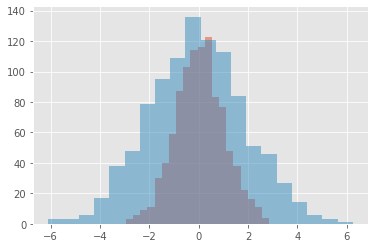

p = 0.06388833912134614
統計的有意な差はない


In [ ]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

np.random.seed(0)
n = 1000
sig_lev = 0.05  # 有意水準
x1 = np.random.normal(0.1, 1, n)
x2 = np.random.normal(-0.1, 2, n)

plt.style.use('ggplot')
plt.figure()
plt.hist(x1, bins=20, alpha=.5)
plt.hist(x2, bins=20, alpha=.5)
plt.show()

t, p = ttest_ind(x1, x2, equal_var=False)
print('p =', p)
if p < sig_lev:
    print('統計的有意な差がある')
else:
    print('統計的有意な差はない')

以前は、分散が等しいかどうかを(F検定という方法で）検定して、分散に差があると言えないときはスチューデントのt検定を使い、分散に差があると言えるときはウェルチのt検定を使っていました。

最近では、検定に検定を重ねることの弊害が指摘されていて、最初からウェルチのt検定を使えばいいことになっています。

## 無相関検定: 相関係数の検定
「二変数の間に相関がない（$r = 0$）」という帰無仮説を立てて、これを棄却することによって「二変数の間に相関がないとはいえない」とする検定を**無相関検定**といいます。

無相関検定を行うには、`scipy.stats.pearsonr()` を使います。

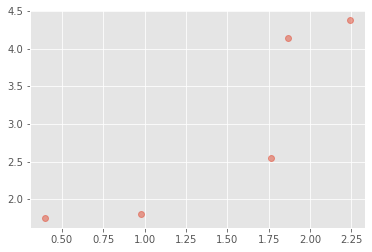

r = 0.8772818290167711 , p =  0.05064503255222443
統計的有意な相関ではない


In [ ]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

np.random.seed(0)
n = 5
sig_lev = 0.05
x1 = np.random.normal(0, 1, n)
x2 = 2 * x1 + np.random.normal(0, 1, n)

plt.style.use('ggplot')
plt.figure()
plt.plot(x1, x2, 'o', alpha=.5)
plt.show()

r, p = pearsonr(x1, x2)
print('r =', r, ', p = ', p)
if p < sig_lev:
    print('統計的有意な相関である')
else:
    print('統計的有意な相関ではない')

# 演習

## 演習1（ベイズの定理）
ある企業では、ある製品の8割を春日井工場で、残りの2割を小牧工場で生産している。
春日井工場では不良品が1%発生し、小牧工場では不良品が2%含まれてしまうことがわかっている。

不良品が1つ見つかったとき、この不良品が春日井工場で生産されたものである確率を求めよ

In [2]:
a = 0.01*0.8/(0.01*0.8+0.02*0.2)
print(a)

0.6666666666666666


## 演習2（点推定）
Irisデータセットに含まれるSetosaのがく片の長さ (Sepal length) について、母集団の平均と標準偏差を推定せよ

In [3]:
import numpy as np
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris = iris_dataset.data
seto = iris[0:50]
seto_sepal_len = seto[:,0]
print(seto_sepal_len)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


In [4]:
heikin = np.mean(seto_sepal_len)
print(heikin)

5.006


In [5]:
hensa = np.std(seto_sepal_len,ddof=1)
print(hensa)

0.35248968721345136


## 演習3（区間推定）
Setosaのがく片の長さについて、母集団の平均の区間を包含係数を2とした拡張不確かさを用いて推定せよ。

また、同様に、母集団の平均の95%信頼区間を推定せよ

In [6]:
import numpy as np

n = len(seto_sepal_len)
mu = np.mean(seto_sepal_len)
s = np.std(seto_sepal_len, ddof=1)
u = s / np.sqrt(n)
U = 2 * u
print('x = ', mu, '±', U)

x =  5.006 ± 0.09969913925078261


In [7]:
from scipy.stats import t

U = t.ppf(0.975, n-1) * u
print('x = ', mu, '±', U)

x =  5.006 ± 0.10017646056913188


## 演習4（分布）
演習2で求めたSetosaのがく片の長さについて、その平均と不偏標準偏差の正規分布に従うデータを1000点生成し、そのヒストグラムを作成せよ



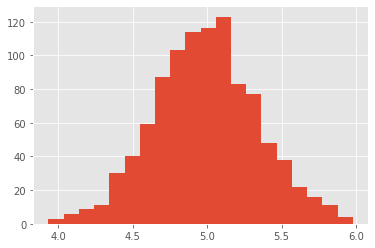

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.random.normal(mu, s, 1000)
data = np.random.normal()

plt.style.use('ggplot')
plt.figure()
plt.hist(data,bins =20)
plt.show()

## 演習5（t検定）
Virginicaのがく片の長さと花びらの長さ (Petal length) について、その平均に1%有意水準で統計的有意な差があるかどうかを調べよ。

また、Versicolorのがく片の長さとVirginicaのがく片の長さについて、その平均に5%有意水準で統計的有意な差があるかどうかを調べよ

In [10]:
import numpy as np
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris = iris_dataset.data
vers = iris[50:100]
virg = iris[100:150]
vers_sepal_len = vers[:,0]
virg_sepal_len = virg[:,0]
virg_petal_len = virg[:,2]
print(vers_sepal_len)
print(virg_sepal_len)
print(virg_petal_len)

[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
[6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7
 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.  4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1
 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9 5.7 5.2 5.  5.2 5.4 5.1]


In [20]:
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

sig_lev = 0.01  # 有意水準
t,p = ttest_rel(virg_sepal_len, virg_petal_len)
print('P : ', p)
if p < sig_lev:
  print('統計的有意義な差がある')
else:
  print('差はない')

P :  7.985259485031611e-28
統計的有意義な差がある


In [26]:
import numpy as np
from scipy.stats import ttest_rel, ttest_ind#分布が等しいか等しくないかで変わる
import matplotlib.pyplot as plt

sig_lev = 0.05  # 有意水準
t,p = ttest_ind(virg_sepal_len, vers_sepal_len, equal_var=False)
print('P : ', p)
if p < sig_lev:
  print('統計的有意義な差がある')
else:
  print('差はない')

P :  1.8661443873771216e-07
統計的有意義な差がある


## 演習6（無相関検定）
Virginicaのがく片の長さと花びらの長さについて、1%有意水準で統計的有意な相関があるか調べよ

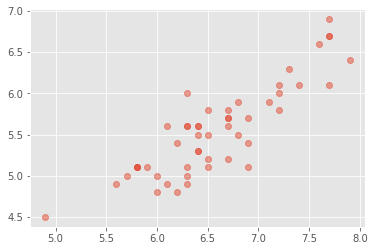

r = 0.8642247329355762 , p =  6.29778575890394e-16
統計的有意な相関である


In [27]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


x1 = virg_sepal_len
x2 = virg_petal_len
sig_lev = 0.01

plt.style.use('ggplot')
plt.figure()
plt.plot(x1, x2, 'o', alpha=.5)
plt.show()

r, p = pearsonr(x1, x2)
print('r =', r, ', p = ', p)
if p < sig_lev:
    print('統計的有意な相関である')
else:
    print('統計的有意な相関ではない')